### Importing the necessary libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Defining constants

In [9]:
MUTATION_PROBABILITY = [0.02, 0.02]

### RandomVariable
The class has the following variables:
- Public:
    - **luck**: A random real number in [0, 5)
    - **skill**: A random real number in [0, 95)

In [10]:
class RandomVariable():
    def __init__(self):
        self.luck = 0
        self.skill = 0
        self.__calc_values()

    def __calc_values(self):
        self.luck = np.random.random() * 5
        self.skill = np.random.random() * 95

### Person
The class has the following variables:
- Public:
    - **luck**: The luck of the person
    - **skill**: The skill of the person
    - **capability**: luck + skill (out of 100)

In [11]:
class Person():
    def __init__(self, luck, skill):
        self.luck = luck
        self.skill = skill
        self.capability = luck + skill

    def mate(self, par2):
        global MUTATION_PROBABILITY
        rv = RandomVariable()
        prob = np.random.rand(5)
        if prob[0] < (1-MUTATION_PROBABILITY[0])/2:
            new_luck = self.luck
        elif prob[0] < (1-MUTATION_PROBABILITY[0]):
            new_luck = par2.luck
        else:
            new_luck = rv.luck
        if prob[1] < (1-MUTATION_PROBABILITY[1])/2:
            new_skill = self.skill
        elif prob[1] < (1-MUTATION_PROBABILITY[1]):
            new_skill = par2.skill
        else:
            new_skill = rv.skill
        return Person(new_luck, new_skill)

### Generation
The class contains the following variables:
- Private:
    - **__parents**: Details regarding the sorted previous population
    - **__number**: The number of generation
- Public:
    - **new_population**: The sorted population obtained by mating of the best among previous population

In [12]:
class Generation():
    def __init__(self, parents, number):
        self.__parents = parents
        self.__number = number
        self.population = self.__mate()

    def __mate(self):
        population = []
        population.extend(self.__parents[:10])
        for i in range(90):
            par1 = np.random.choice(self.__parents[:30])
            par2 = np.random.choice(self.__parents[:30])
            child = par1.mate(par2)
            population.append(child)
        population = sorted(population,  key=lambda x: -x.capability)
        return population

    def print_fittest(self):
        print("Generation: {}".format(self.__number))
        print("    Capability: {}".format(self.population[0].capability))
        print("         Skill: {}".format(self.population[0].skill))
        print("          Luck:  {}".format(self.population[0].luck))

    def plot(self):
        plt.figure(figsize=(20, 10))
        plt.scatter(range(1, 101), [i.capability for i in self.population])
        plt.title("Generation " + str(self.__number))
        plt.xlabel("Person ID")
        plt.ylabel("Capability")
        plt.show()

### Generating initial dataset
Assuming 100 individuals initially, with completely arbitrary skill and luck level

Generation: 1
    Capability: 96.79404488832583
         Skill: 92.43047373695016
          Luck:  4.3635711513756705


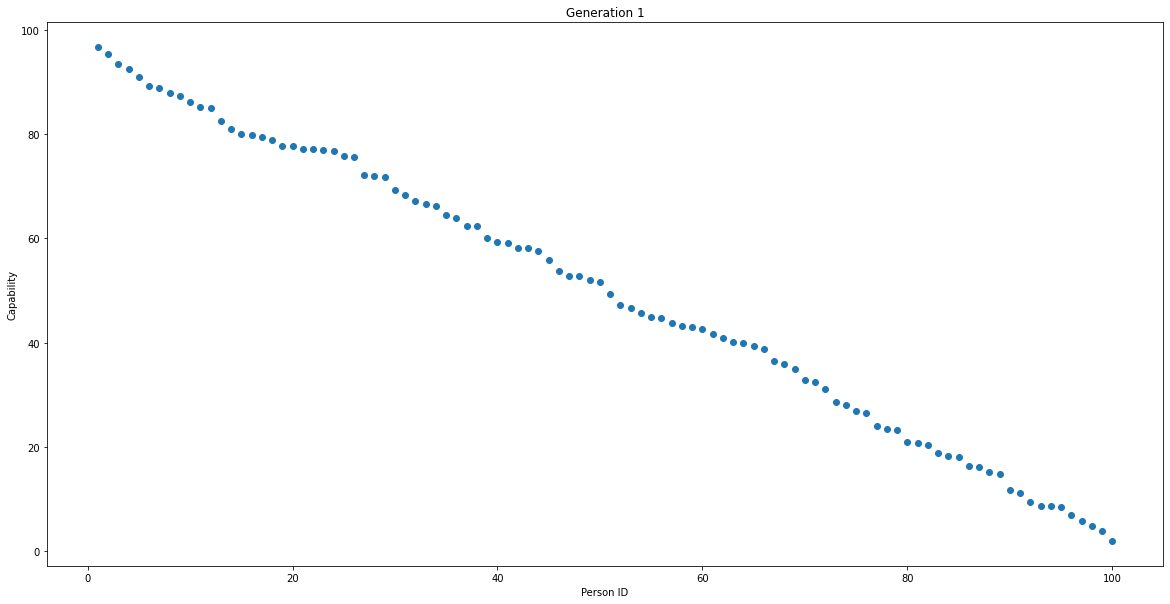

In [13]:
population = []
for i in range(100):
    rv = RandomVariable()
    individual = Person(rv.luck, rv.skill)
    population.append(individual)
population = sorted(population, key=lambda x: -x.capability)
print("Generation: 1")
print("    Capability: {}".format(population[0].capability))
print("         Skill: {}".format(population[0].skill))
print("          Luck:  {}".format(population[0].luck))

plt.figure(figsize=(20, 10))
plt.scatter(range(1, 101), [i.capability for i in population])
plt.title("Generation 1")
plt.xlabel("Person ID")
plt.ylabel("Capability")
plt.show()

### Genetic Algorithm
Running a genetic algorithm to find out the optimum value for selection, which ideally should be 100

Generation: 2
    Capability: 97.03570170242978
         Skill: 93.60709373030451
          Luck:  3.4286079721252616


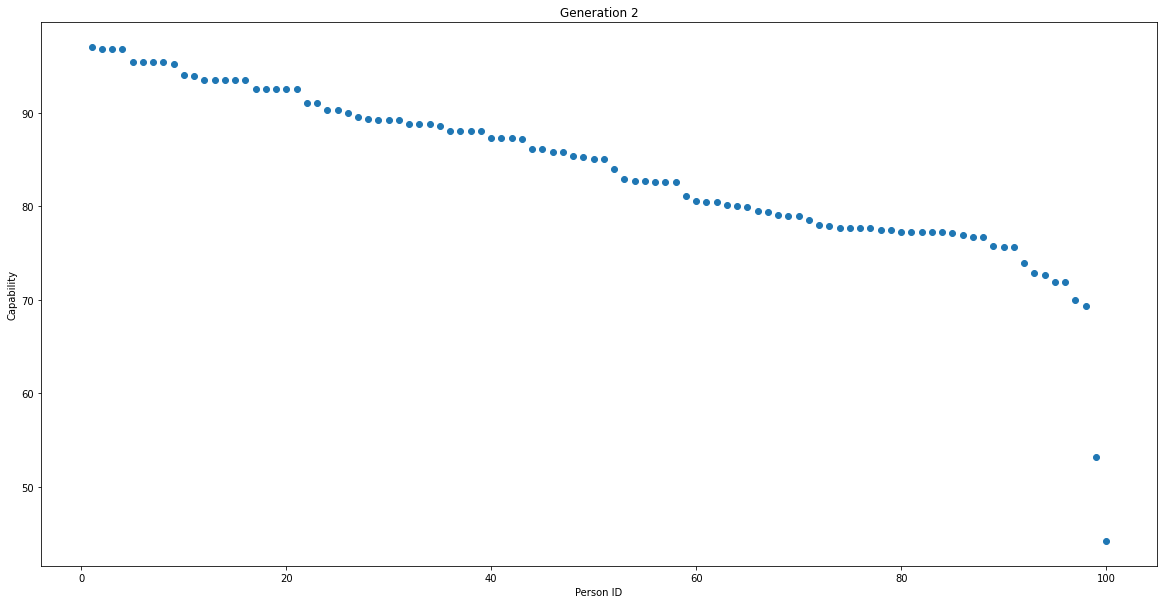

Generation: 3
    Capability: 97.2940413385364
         Skill: 92.34862332924006
          Luck:  4.945418009296347


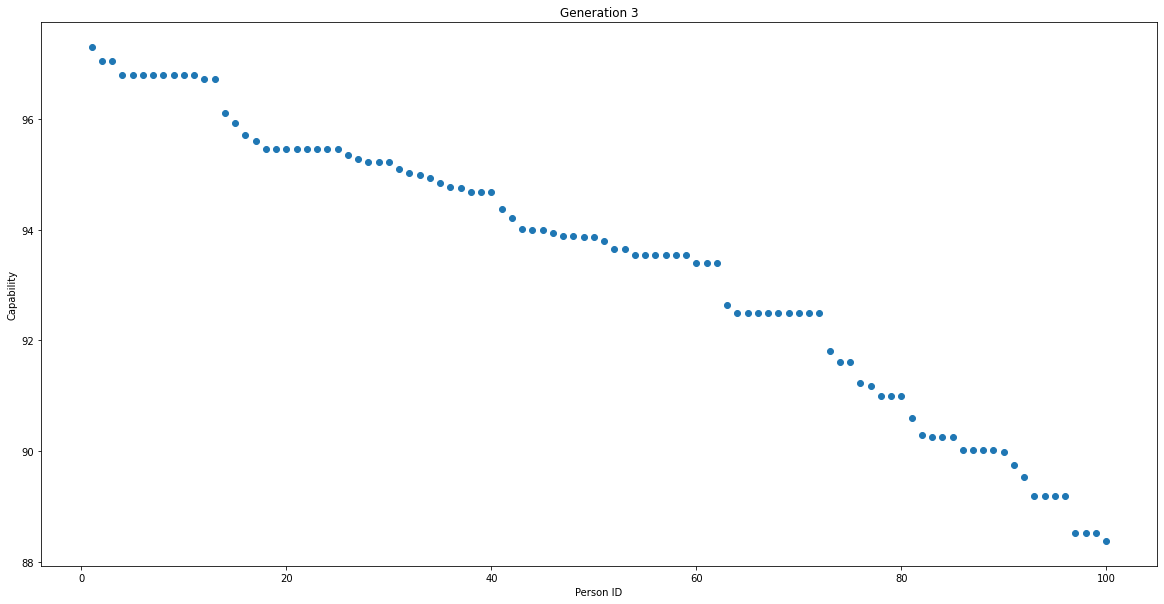

Generation: 4
    Capability: 98.55251173960086
         Skill: 93.60709373030451
          Luck:  4.945418009296347


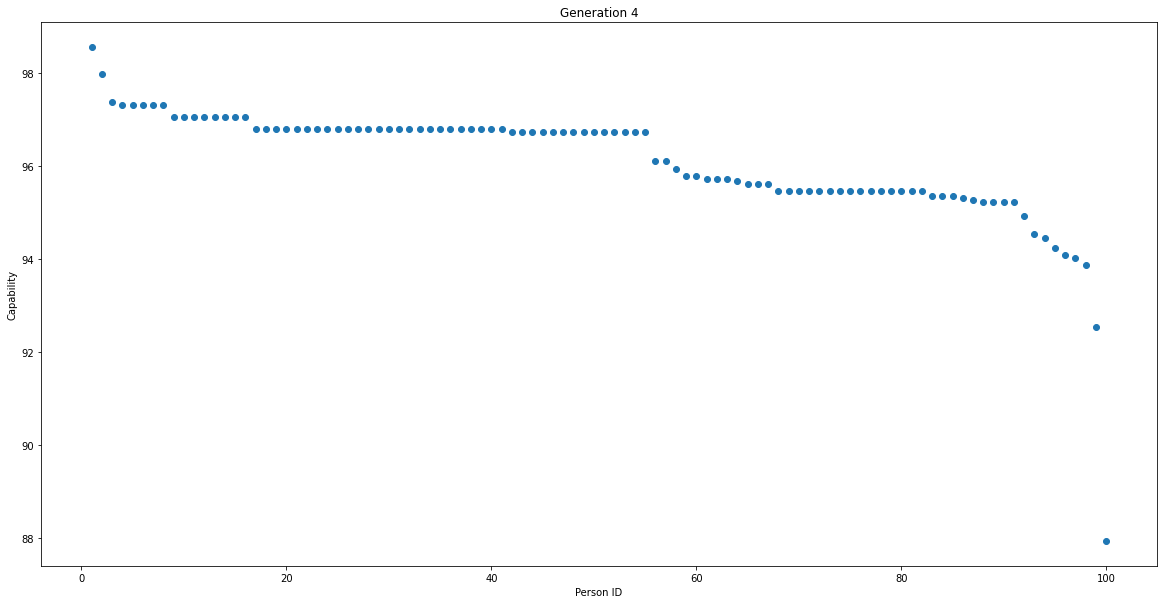

Generation: 5
    Capability: 98.55251173960086
         Skill: 93.60709373030451
          Luck:  4.945418009296347


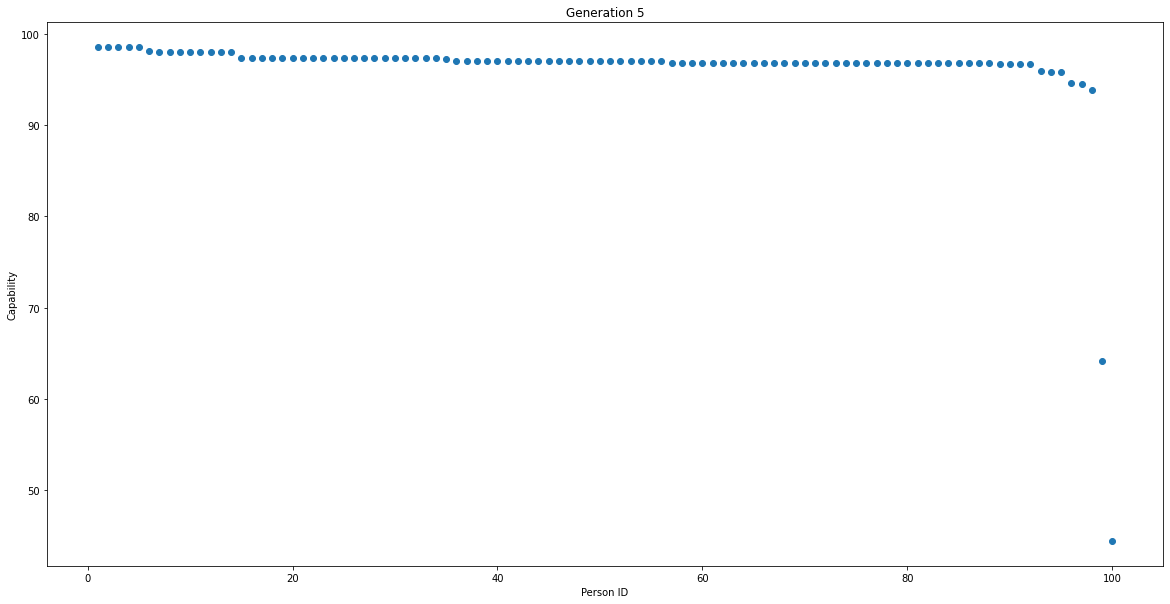

In [14]:
for i in range(2, 6):
    generation = Generation(population, i)
    generation.print_fittest()
    generation.plot()
    population = generation.population

### Observation
As we can see, with each iteration, the capability of the ideal candidate tends to 100. This translates to 5% Luck and 95% Skill.

This problem statement was inspired by a <a href="https://youtu.be/3LopI4YeC4I?t=217">YouTube video</a> posted by <a href="https://www.youtube.com/c/veritasium">Veritasium</a>